# 1. Algorithm's Basics

- **Created by Andrés Segura Tinoco**
- **Created on Dec 18, 2019**

In [1]:
# Load the Python libraries
import numpy as np
import math
import random
import timeit
from scipy import stats
from itertools import cycle

In [2]:
# Load plotting libraries
import matplotlib.pyplot as plt

## 1.1. Greatest Common Divisor (GCD)

In [3]:
# Example values
m = 12000000
n = 76000000

### Simple approach

In [4]:
# Function that returns the GCD of two values (intuitive algorithn)
def gcd_simple(m, n):
    i = min(m, n) + 1
    
    while (m % i != 0) or (n % i != 0):
        i -= 1
        
    return i

In [5]:
start_time = timeit.default_timer()
print(gcd_simple(m, n))
print('>> elapsed time', (timeit.default_timer() - start_time) * 1000, 'ms')

4000000
>> elapsed time 1400.1078 ms


### Enhanced approach

In [6]:
# Function that returns the GCD of two values (euclidean algorithm)
def gcd_euclidean(m, n):
    
    while m > 0:
        t = m
        m = n % m
        n = t
    
    return n

In [7]:
start_time = timeit.default_timer()
print(gcd_euclidean(m, n))
print('>> elapsed time', (timeit.default_timer() - start_time) * 1000, 'ms')

4000000
>> elapsed time 1.1772999999999367 ms


## 1.2. Fibonacci Serie

In [8]:
# Example value
n = 35

### Recursive algorithm

In [9]:
# Function that returns the n-fibonacci value (recursive algorithm)
def fibo_rec(n):
    if n < 2:
        return n
    else:
        return fibo_rec(n - 1) + fibo_rec(n - 2)

In [10]:
start_time = timeit.default_timer()
print(fibo_rec(n))
print('>> elapsed time', (timeit.default_timer() - start_time) * 1000, 'ms')

9227465
>> elapsed time 6398.4564 ms


### Iterative algorithm

In [11]:
# Function that returns the n-fibonacci value (iterative algorithm)
def fibo_iter(n):
    i, j = 1, 0
    
    for k in range(n):
        j = i + j
        i = j - i
    
    return j

In [12]:
start_time = timeit.default_timer()
print(fibo_iter(n))
print('>> elapsed time', (timeit.default_timer() - start_time) * 1000, 'ms')

9227465
>> elapsed time 3.798799999999325 ms


### Approximation approach
With the De Moivre's formula:

$$ f_{n} = {\frac{1}{\sqrt{5}}}{[\phi^n -(-\phi)^{-n}]} \tag{1}, $$
$$ \phi = (1 + \sqrt{5})\,/\,2 $$

In [13]:
# Function that returns the n-fibonacci value (De Moivre equation)
def fibo_de_moivre(n):
    golden_ratio = (1 + 5**(1/2)) / 2
    f = (golden_ratio**n - (-golden_ratio)**(-n)) / 5**(1/2)
    return int(f)

In [14]:
start_time = timeit.default_timer()
print(fibo_de_moivre(n))
print('>> elapsed time', (timeit.default_timer() - start_time) * 1000, 'ms')

9227465
>> elapsed time 1.0753000000001123 ms


## 1.3. Integer Factorization

In [15]:
# Example values
a, b = 104723, 104729
n = a * b
n

10967535067

In [16]:
# Function that returns the factorization of an integer (ascending approach)
def fact_int(n):
    nn = n**(1/2)
    m = 2
    
    while m < nn:
        if n % m == 0:
            return (m, n // m)
        m += 1
    
    return (1, n)

In [17]:
start_time = timeit.default_timer()
print(fact_int(n))
print('>> elapsed time', (timeit.default_timer() - start_time) * 1000, 'ms')

(104723, 104729)
>> elapsed time 36.96889999999975 ms


In [18]:
# Function that returns the factorization of an integer (descending approach)
def fact_int_2(n):
    nn = n**(1/2)
    m = int(nn)
    
    while m > 1:
        if n % m == 0:
            return (m, n // m)
        m -= 1
    
    return (1, n)

In [19]:
start_time = timeit.default_timer()
print(fact_int_2(n))
print('>> elapsed time', (timeit.default_timer() - start_time) * 1000, 'ms')

(104723, 104729)
>> elapsed time 1.1533000000003568 ms


## 1.4. Tower of Hanoi

In [20]:
# Disk number between 2 and 64 (not recommended)
n_disks = 5

### The recursive and classic algorithm

In [21]:
# Move n disk from source to destination
def hanoi_rec(n, source, aux, target):
    if n > 0:
        hanoi_rec(n - 1, source, target, aux)
        print('Move disk', n, 'from:', source, 'to:', target)
        hanoi_rec(n - 1, aux, source, target)

In [22]:
start_time = timeit.default_timer()
print('>> number of movements:', (2**n_disks - 1))
hanoi_rec(n_disks, 'T1', 'T2', 'T3')
print('>> elapsed time', (timeit.default_timer() - start_time) * 1000, 'ms')

>> number of movements: 31
Move disk 1 from: T1 to: T3
Move disk 2 from: T1 to: T2
Move disk 1 from: T3 to: T2
Move disk 3 from: T1 to: T3
Move disk 1 from: T2 to: T1
Move disk 2 from: T2 to: T3
Move disk 1 from: T1 to: T3
Move disk 4 from: T1 to: T2
Move disk 1 from: T3 to: T2
Move disk 2 from: T3 to: T1
Move disk 1 from: T2 to: T1
Move disk 3 from: T3 to: T2
Move disk 1 from: T1 to: T3
Move disk 2 from: T1 to: T2
Move disk 1 from: T3 to: T2
Move disk 5 from: T1 to: T3
Move disk 1 from: T2 to: T1
Move disk 2 from: T2 to: T3
Move disk 1 from: T1 to: T3
Move disk 3 from: T2 to: T1
Move disk 1 from: T3 to: T2
Move disk 2 from: T3 to: T1
Move disk 1 from: T2 to: T1
Move disk 4 from: T2 to: T3
Move disk 1 from: T1 to: T3
Move disk 2 from: T1 to: T2
Move disk 1 from: T3 to: T2
Move disk 3 from: T1 to: T3
Move disk 1 from: T2 to: T1
Move disk 2 from: T2 to: T3
Move disk 1 from: T1 to: T3
>> elapsed time 11.579399999998685 ms


### Iterative algorithm

In [23]:
# Move n disk from source to destination
def hanoi_iter(n, source, aux, target):
    n_movements = 2**n_disks - 1
    print('>> number of movements:', n_movements)

    tw_src = []
    for i in range(n_disks, 0, -1):
        tw_src.append(i)
    
    labels = [source, aux, target]
    towers = [tw_src, [], []]
    indexes = cycle([0, 1, 2] if n % 2 == 0 else [0, 2, 1])
    temp = next(indexes)
    disk = 0
    
    for i in range(1, n_movements + 1):
        if i % 2 == 1:
            disk = 1
            s, t = temp, next(indexes)
            temp = t
            towers[t].append(towers[s].pop())
            print('Move disk', disk, 'from:', labels[s], 'to:', labels[t])
        else:
            i_t2, i_t3 = [i for i in range(3) if i != temp]
            v_t2 = towers[i_t2][len(towers[i_t2]) - 1] if len(towers[i_t2]) else math.inf
            v_t3 = towers[i_t3][len(towers[i_t3]) - 1] if len(towers[i_t3]) else math.inf
            
            if v_t2 < v_t3:
                s, t = i_t2, i_t3
            else:
                s, t = i_t3, i_t2
            
            disk = towers[s].pop()
            towers[t].append(disk)
            print('Move disk', disk, 'from:', labels[s], 'to:', labels[t])

In [24]:
start_time = timeit.default_timer()
hanoi_iter(n_disks, 'T1', 'T2', 'T3')
print('>> elapsed time', (timeit.default_timer() - start_time) * 1000, 'ms')

>> number of movements: 31
Move disk 1 from: T1 to: T3
Move disk 2 from: T1 to: T2
Move disk 1 from: T3 to: T2
Move disk 3 from: T1 to: T3
Move disk 1 from: T2 to: T1
Move disk 2 from: T2 to: T3
Move disk 1 from: T1 to: T3
Move disk 4 from: T1 to: T2
Move disk 1 from: T3 to: T2
Move disk 2 from: T3 to: T1
Move disk 1 from: T2 to: T1
Move disk 3 from: T3 to: T2
Move disk 1 from: T1 to: T3
Move disk 2 from: T1 to: T2
Move disk 1 from: T3 to: T2
Move disk 5 from: T1 to: T3
Move disk 1 from: T2 to: T1
Move disk 2 from: T2 to: T3
Move disk 1 from: T1 to: T3
Move disk 3 from: T2 to: T1
Move disk 1 from: T3 to: T2
Move disk 2 from: T3 to: T1
Move disk 1 from: T2 to: T1
Move disk 4 from: T2 to: T3
Move disk 1 from: T1 to: T3
Move disk 2 from: T1 to: T2
Move disk 1 from: T3 to: T2
Move disk 3 from: T1 to: T3
Move disk 1 from: T2 to: T1
Move disk 2 from: T2 to: T3
Move disk 1 from: T1 to: T3
>> elapsed time 13.230699999999374 ms


## 1.5. Sorting Algorithm

In [25]:
# Bubble-sort: non-efficient sorting algorithm
def bubble_sort(array):
    n = len(array)
    for i in range(n):
        for j in range(0, n-i-1):
            if array[j] > array[j+1] :
                array[j], array[j+1] = array[j+1], array[j]
    
    return array

With computational complexity of $ \Theta(n^2) $ and space complexity of $ \Theta(n) $.

In [26]:
# Example values
x_data = []
raw_data = []
n = 1000
for i in range(n):
    x_data.append(i)
    raw_data.append(int(random.random() * n))

In [27]:
# Sorting data
sorted_data = bubble_sort(raw_data.copy())

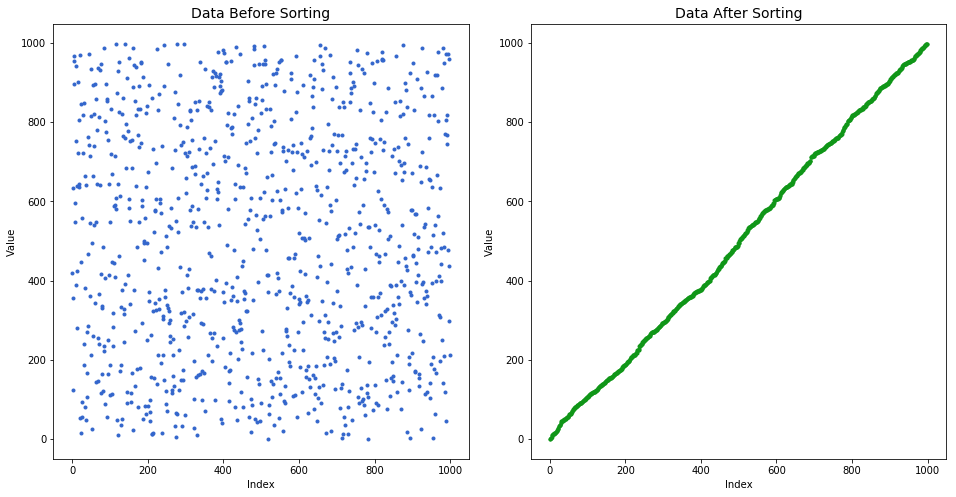

In [28]:
# Plotting
fig = plt.figure(figsize = (16, 8))
fig.subplots_adjust(hspace = 0.15, wspace = 0.15)

# Plotting results before sorting
plt.subplot(1, 2, 1)
plt.plot(raw_data, linewidth=0, marker="o", markersize=3, color="#3366cc")
plt.title("Data Before Sorting", fontsize = 14)
plt.ylabel('Value')
plt.xlabel('Index')

# Plotting results after sorting
plt.subplot(1, 2, 2)
plt.plot(sorted_data, linewidth=0, marker="o", markersize=3, color="#109618")
plt.title("Data After Sorting", fontsize = 14)
plt.ylabel('Value')
plt.xlabel('Index')
plt.show()

## 1.6. Changing Distribution

Creating a toy uniform distribution:

In [29]:
# Initialize variables
n = 256
data_raw = [25] * n
total = sum(data_raw)
print('Total values:', total)

Total values: 6400


In [30]:
# Creating target distribution
alpha = 0.02
t_func = stats.norm(n/2, alpha*n)
x = np.linspace(0, n, n)
y = t_func.pdf(x) * total

In [31]:
# Create pretty x axis labels
def get_x_labels(n):
    x_labels = []
    for ix in range(n):
        if ix % 10 == 0:
            x_labels.append(str(ix))
        else:
            x_labels.append('')
    return x_labels

In [32]:
# Function that plots a symbol distribution
def plot_symbol_dist(data, x, y):
    
    # Prepare data
    n = len(data)
    y_pos = np.arange(n)
    symbols = get_x_labels(n)
    
    # Plot distribution
    plt.figure(figsize = (12, 5))
    plt.plot(x, y, '-', color = '#ff7f0e', lw = 3, label = 'Real distribution')
    plt.bar(y_pos, data, align='center', alpha=0.5)
    plt.xticks(y_pos, symbols, fontsize = 10, rotation = 50)
    plt.ylabel('Value')
    plt.title('Distribution')
    plt.show()

In [33]:
# Function that calculates the new distribution
def get_new_dist(data_raw, y):
    a = []
    b = []
    n = len(data_raw)
    
    carry = 0
    for i in range(n // 2):
        y1 = data_raw[i] + carry
        y2 = max(math.floor(y[i]), 1)
        y_new = min(y1, y2)
        a.append(y_new)
        carry = y1 - y_new
    print('Forward carry:', carry)
    
    for i in range(n - 1, n // 2 - 1, -1):
        y1 = data_raw[i] + carry
        y2 = max(math.floor(y[i]), 1)
        y_new = min(y1, y2)
        b.append(y_new)
        carry = y1 - y_new    
    print('backward carry:', carry)
    
    # Concatenate arrays
    data_new = a + b[::-1]
    return data_new

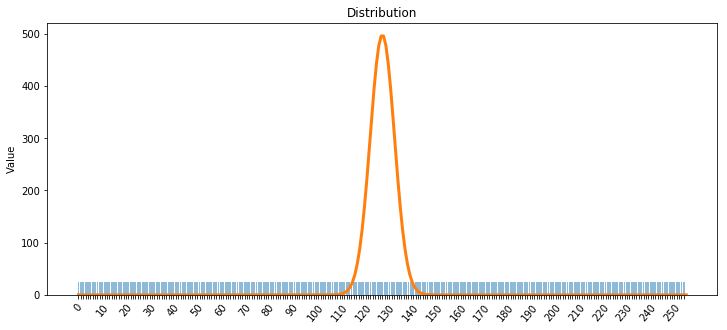

In [34]:
# Plot current distribution
plot_symbol_dist(data_raw, x, y)

Calculate and plot new distribution (Normal):

In [35]:
data_new = get_new_dist(data_raw, y)
print('n temp:', len(data_new))

Forward carry: 0
backward carry: 0
n temp: 256


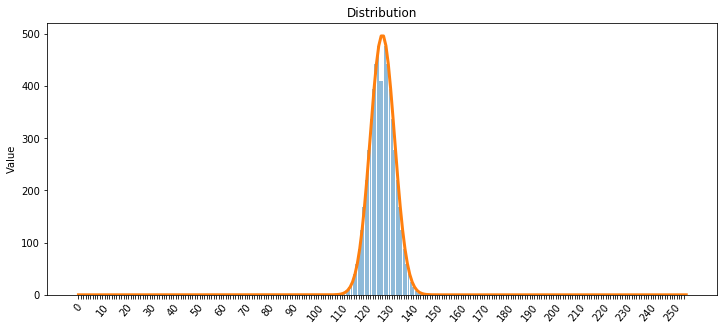

In [36]:
plot_symbol_dist(data_new, x, y)

Validation:

In [37]:
# Difference between distributions
print('>> diff:', total - sum(data_new))

>> diff: 0


---
<a href="https://ansegura7.github.io/Algorithms/">« Home</a>